In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

weight=[ 72, 72, 70, 43, 48, 54, 51, 52, 73, 45, 60, 62, 64, 47, 51, 74, 88,64, 56, 56  ]
tall = [ 176, 172, 182, 160, 163, 165, 168, 163, 182, 148, 170, 166, 172, 169, 163, 170, 182, 174, 164, 160 ] 

dict_data = { 'weight' : [ 72, 72, 70, 43, 48, 54, 51, 52, 73, 45, 60, 62, 64, 47, 51, 74, 88, 64, 56, 56  ],
                  'tall' : [ 176, 172, 182, 160, 163, 165, 168, 163, 182, 148, 170, 166, 172, 169, 163, 170, 182, 174, 164, 160 ]   }

df = pd.DataFrame(dict_data)
print (df)

    weight  tall
0       72   176
1       72   172
2       70   182
3       43   160
4       48   163
5       54   165
6       51   168
7       52   163
8       73   182
9       45   148
10      60   170
11      62   166
12      64   172
13      47   169
14      51   163
15      74   170
16      88   182
17      64   174
18      56   164
19      56   160


In [5]:


# 데이터 살펴보기
print(df.head())
print('\n')


   weight  tall
0      72   176
1      72   172
2      70   182
3      43   160
4      48   163




In [6]:
# IPython 디스플레이 설정 - 출력할 열의 개수 한도 늘리기
pd.set_option('display.max_columns', 10)
print(df.head())
print('\n')
'''
[Step 2] 데이터 탐색
'''
# 데이터 자료형 확인
print(df.info())
print('\n')

# 데이터 통계 요약정보 확인
print(df.describe())
print('\n')


   weight  tall
0      72   176
1      72   172
2      70   182
3      43   160
4      48   163


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   weight  20 non-null     int64
 1   tall    20 non-null     int64
dtypes: int64(2)
memory usage: 448.0 bytes
None


          weight        tall
count  20.000000   20.000000
mean   60.100000  168.450000
std    11.907097    8.450942
min    43.000000  148.000000
25%    51.000000  163.000000
50%    58.000000  168.500000
75%    70.500000  172.500000
max    88.000000  182.000000




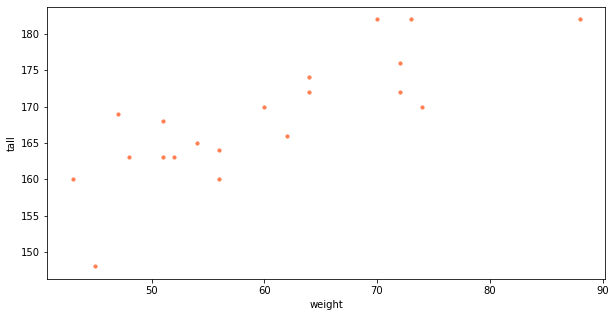

In [8]:


### 종속 변수 Y인 "연비(mpg)"와 다른 변수 간의 선형관계를 그래프(산점도)로 확인
# Matplotlib으로 산점도 그리기
df.plot(kind='scatter', x='weight', y='tall', c='coral', s=10, figsize=(10, 5))
plt.show()
plt.close()


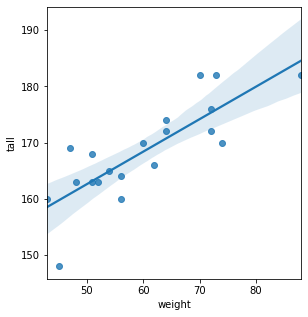

In [11]:
# seaborn으로 산점도 그리기
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 2, 1)
sns.regplot(x='weight', y='tall', data=df, ax=ax1) # 회귀선 표시
plt.show()
plt.close()

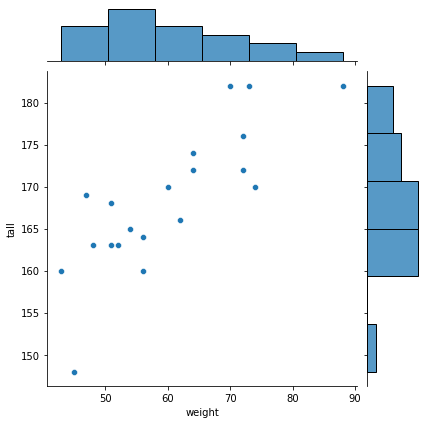

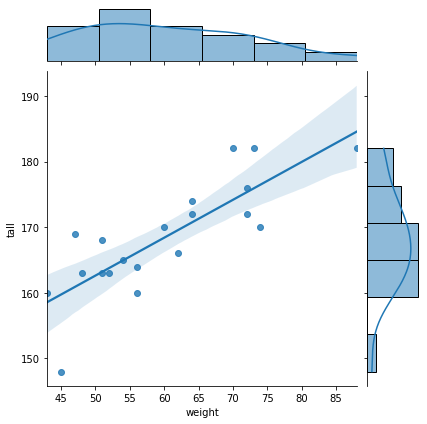

In [12]:
# seaborn 조인트 그래프 - 산점도, 히스토그램
sns.jointplot(x='weight', y='tall', data=df) # 회귀선 없음
sns.jointplot(x='weight', y='tall', kind='reg', data=df) # 회귀선 표시
plt.show()
plt.close()


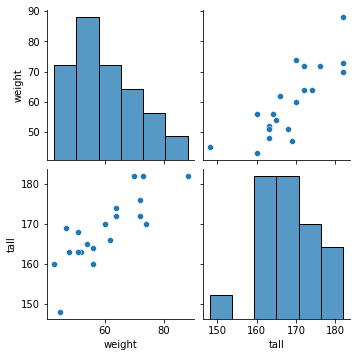

In [14]:
# seaborn pariplot으로 두 변수 간의 모든 경우의 수 그리기
sns.pairplot(df)
plt.show()
plt.close()

In [16]:


# 속성(변수) 선택
X=df[['weight']] #독립 변수 X
y=df['tall'] #종속 변수 Y


In [17]:
# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, #독립 변수
 y, #종속 변수
 test_size=0.3, #검증 30%
 random_state=10) #랜덤 추출 값

print('train data 개수: ', len(X_train))
print('test data 개수: ', len(X_test))

train data 개수:  14
test data 개수:  6


In [18]:

# sklearn 라이브러리에서 선형회귀분석 모듈 가져오기
from sklearn.linear_model import LinearRegression


In [19]:

# 단순회귀분석 모형 객체 생성
lr = LinearRegression()

# train data를 가지고 모형 학습
lr.fit(X_train, y_train)



LinearRegression()

In [20]:
# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
r_square = lr.score(X_test, y_test)
print(r_square)
print('\n')


0.3075076086973403




In [21]:
# 회귀식의 기울기
print('기울기 a: ', lr.coef_)
print('\n')

# 회귀식의 y절편
print('y절편 b', lr.intercept_)
print('\n')


기울기 a:  [0.61126545]


y절편 b 131.24420058341437




C:\Users\goboy\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\goboy\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


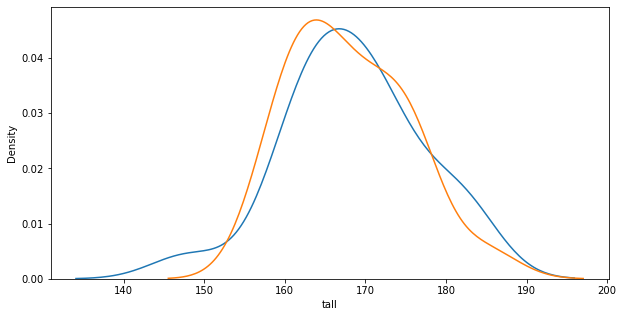

In [22]:
# 모형에 전체 X 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교
y_hat = lr.predict(X)
plt.figure(figsize=(10, 5))
ax1 = sns.distplot(y, hist=False, label="y")
ax2 = sns.distplot(y_hat, hist=False, label="y_hat", ax=ax1)
plt.show()
plt.close()
